In [1]:
import sys
import numpy as np 
import os

import keras
import tensorflow as tf

sys.path.append('../../')
import dnn
from dnn.io.readerseqdataset import ReaderSeqDataset
from dnn.util.keras.augmentations import Augmentations 
from dnn.util.generators.imgseq.generator import ImageSeqDataGenerator

# import basic plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Import magic commands for jupyter notebook 
# - autoreloading a module
# - profiling functions for memory usage and scripts
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%load_ext memory_profiler

Using TensorFlow backend.
/Users/adam2392/Documents/dnn-unsupervised/.venv/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Load in Test Data

In [2]:
# Load in the data
traindir = '/Users/adam2392/Downloads/tngpipeline/freq/fft_img/'
testdir = traindir
testpat = 'id001_bt'
procedure = 'loo'

reader = ReaderSeqDataset()
reader.load_filepaths(traindir, testdir, procedure, testpat)

2018-06-14 13:59:09,690 - INFO - ReaderSeqDataset - Reading testing data directory /Users/adam2392/Downloads/tngpipeline/freq/fft_img/ 
2018-06-14 13:59:09,691 - INFO - ReaderSeqDataset - Getting test files for id001_bt
2018-06-14 13:59:09,695 - INFO - ReaderSeqDataset - Reading training data directory /Users/adam2392/Downloads/tngpipeline/freq/fft_img/ 
2018-06-14 13:59:09,698 - INFO - ReaderSeqDataset - Found 79 training files and 3 testing files.
2018-06-14 13:59:09,698 - INFO - ReaderSeqDataset - Finished reading in data by directories!


In [3]:
seqlen = 20
reader.loadfiles_list(seqlen, mode='TEST')

2018-06-14 13:59:09,745 - INFO - ReaderSeqDataset - Loading files from directory!


  0%|          | 0/3 [00:00<?, ?it/s]

(287, 1)
(287, 64, 64, 4)
(344, 64, 64, 4)
0


 33%|███▎      | 1/3 [00:00<00:00,  2.45it/s]

1


 67%|██████▋   | 2/3 [00:00<00:00,  2.95it/s]

2


100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


In [4]:
X = np.array(reader.test_dataset.X_test)
y = np.array(reader.test_dataset.y_test)

print(X.shape)
print(len(y))
print(y.shape)

(804, 20, 64, 64, 4)
804
(804, 20)


In [5]:
imagedatagen_args = {
    'featurewise_center':True,  # set input mean to 0 over the dataset
    'samplewise_center':True,  # set each sample mean to 0
    'featurewise_std_normalization':True,  # divide inputs by std of the dataset
    'samplewise_std_normalization':True,  # divide each input by its std
    'zca_whitening':False,      # apply ZCA whitening
    # randomly rotate images in the range (degrees, 0 to 180)
    'rotation_range':5,
    # randomly shift images horizontally (fraction of total width)
    'width_shift_range':0.2,
    # randomly shift images vertically (fraction of total height)
    'height_shift_range':0.2,
    'horizontal_flip':True,    # randomly flip images
    'vertical_flip':True,      # randomly flip images
    'channel_shift_range':4,
    'fill_mode':'nearest',
    'preprocessing_function':Augmentations.preprocess_imgwithnoise
}

# This will do preprocessing and realtime data augmentation:
generator = ImageSeqDataGenerator(**imagedatagen_args)

In [6]:
generator.fit(X)
flowtest = generator.flow(X, y, batch_size=2)

In [7]:
test, testy = next(flowtest)

In [8]:
print(test.shape)

(2, 20, 64, 64, 4)


<Figure size 432x288 with 0 Axes>

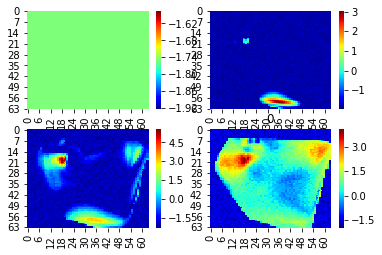

<Figure size 432x288 with 0 Axes>

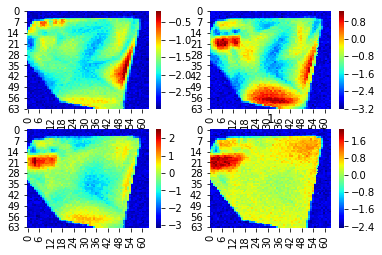

<Figure size 432x288 with 0 Axes>

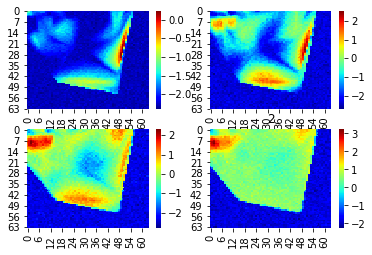

<Figure size 432x288 with 0 Axes>

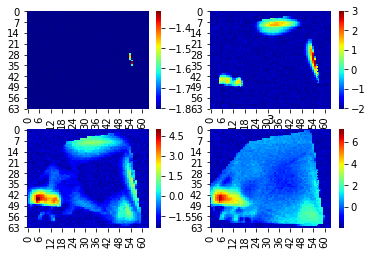

<Figure size 432x288 with 0 Axes>

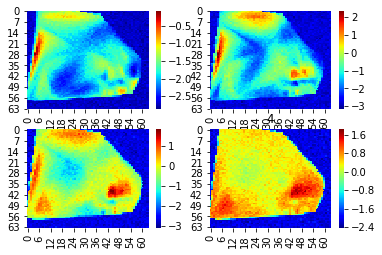

<Figure size 432x288 with 0 Axes>

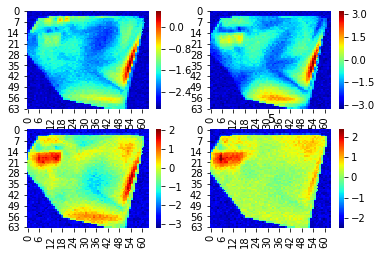

In [9]:
test = test.reshape(-1,64,64,4)

for idx,img in enumerate(test):
    plt.figure()
    plt.subplots(2,2)
    for ichan in range(img.shape[-1]):
        toplot = img[...,ichan]
        
        plt.subplot(2,2,ichan+1)
        sns.heatmap(toplot, cmap='jet')
#         plt.imshow(toplot, cmap='jet', aspect='auto')
    plt.title(idx)
    
    if idx == 5:
        break